In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
import_data = nfl.import_seasonal_data([2022])   
import_data.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [3]:
qb_season_data = pd.DataFrame(index = import_data.index)
qb_season_data["Player ID"] = import_data["player_id"]
qb_season_data["Completions"] = import_data["completions"]
qb_season_data["Attempts"] = import_data["attempts"]
qb_season_data["Passing Yards"] = import_data["passing_yards"]
qb_season_data["Passing TDs"] = import_data["passing_tds"]
qb_season_data["Interceptions"] = import_data["interceptions"]
qb_season_data["Sacked"] = import_data["sacks"]
qb_season_data["Sack Yards"] = import_data["sack_yards"]
qb_season_data["Sack Fumbles"] = import_data["sack_fumbles"]
qb_season_data["Sack Fumbles Lost"] = import_data["sack_fumbles_lost"]
qb_season_data["Air Yards"] = import_data["passing_air_yards"]
qb_season_data["Passing YAC"] = import_data["passing_yards_after_catch"]
qb_season_data["Passing First Downs"] = import_data["passing_first_downs"]
qb_season_data["Passing EPA"] = import_data["passing_epa"]
qb_season_data["2Pt Conversions"] = import_data["passing_2pt_conversions"]
qb_season_data["PACR"] = import_data["pacr"]
qb_season_data["Games Played"] = import_data["games"]

In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
qb_data = pd.DataFrame(index = import_weekly_data.index)
qb_data["Player"] = import_weekly_data["player_name"]
qb_data["Player ID"] = import_weekly_data["player_id"]
qb_data["Team"] = import_weekly_data["recent_team"]
qb_data["Player Full Name"] = import_weekly_data["player_display_name"]
qb_data = qb_data.drop_duplicates(subset=['Player Full Name'])
qb_data.loc[qb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
qb_merged_season_data = qb_data.merge(qb_season_data, left_on='Player ID', right_on='Player ID')
qb_merged_season_data = qb_merged_season_data.loc[qb_merged_season_data["Attempts"] > 20, :]
qb_merged_season_data = qb_merged_season_data.drop(columns=["Player ID"])
qb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Completions,Attempts,Passing Yards,Passing TDs,Interceptions,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
219,K.Murray,ARI,Kyler Murray,113,173,991.0,5,2.0,6.0,45.0,1,0,1029.0,526.0,49.0,-14.097831,2,3.943940,4
73,M.Mariota,ATL,Marcus Mariota,57,98,779.0,3,4.0,7.0,55.0,3,1,1062.0,305.0,38.0,12.098459,1,2.980577,4
191,L.Jackson,BAL,Lamar Jackson,76,117,893.0,11,4.0,8.0,24.0,0,0,1083.0,397.0,39.0,20.019869,0,3.476967,4
200,J.Allen,BUF,Josh Allen,113,168,1227.0,10,3.0,8.0,39.0,2,1,1152.0,514.0,63.0,38.171492,0,4.300556,4
199,B.Mayfield,CAR,Baker Mayfield,64,117,747.0,4,3.0,11.0,83.0,2,0,760.0,462.0,27.0,-26.467873,0,4.063702,4
366,J.Fields,CHI,Justin Fields,34,67,471.0,2,4.0,16.0,81.0,1,1,654.0,219.0,17.0,-21.537563,0,2.816402,4
323,J.Burrow,CIN,Joe Burrow,100,156,1099.0,8,4.0,16.0,93.0,3,1,1141.0,576.0,57.0,12.245714,2,3.866570,4
100,J.Brissett,CLE,Jacoby Brissett,82,127,830.0,4,2.0,5.0,40.0,0,0,865.0,381.0,43.0,6.956038,0,4.263478,4
94,D.Prescott,DAL,Dak Prescott,14,29,134.0,0,1.0,2.0,13.0,0,0,202.0,56.0,6.0,-12.482925,0,0.663366,1
123,C.Rush,DAL,Cooper Rush,62,102,737.0,4,0.0,4.0,23.0,0,0,799.0,306.0,34.0,5.724994,0,3.626911,4


In [6]:
qb_data_ngs = pd.read_csv("../Resources/ngs_2022_passing.csv")
qb_data_ngs = qb_data_ngs.loc[qb_data_ngs["week"] == 0, :]
qb_data_ngs = qb_data_ngs.sort_values(by=['team_abbr'])
qb_data_full = qb_data_ngs.merge(qb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
qb_data_full = qb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", 
                                            "player_jersey_number", "Player", "Team", "Player Full Name", "Completions",
                                           "Attempts", "Passing Yards", "Passing TDs", "Interceptions", "week"])
qb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played'],
      dtype='object')

In [7]:
qb_data_full

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
0,Kyler Murray,QB,ARI,2.617503,3.981150,5.997758,-2.016607,10.982659,38.988774,-2.632545,...,45.0,1,0,1029.0,526.0,49.0,-14.097831,2,3.943940,4
1,Marcus Mariota,QB,ATL,3.159577,7.966667,10.693830,-2.727163,18.367347,38.677138,1.768298,...,55.0,3,1,1062.0,305.0,38.0,12.098459,1,2.980577,4
2,Lamar Jackson,QB,BAL,3.008205,6.492632,9.576549,-3.083917,12.820513,58.484966,0.647345,...,24.0,0,0,1083.0,397.0,39.0,20.019869,0,3.476967,4
3,Josh Allen,QB,BUF,2.698222,6.085398,6.861195,-0.775797,11.309524,55.192900,-1.157673,...,39.0,2,1,1152.0,514.0,63.0,38.171492,0,4.300556,4
4,Baker Mayfield,QB,CAR,2.719291,4.437500,6.686903,-2.249403,13.675214,54.658197,-2.224602,...,83.0,2,0,760.0,462.0,27.0,-26.467873,0,4.063702,4
5,Justin Fields,QB,CHI,3.118940,6.960294,9.314687,-2.354393,4.477612,58.974003,-0.200938,...,81.0,1,1,654.0,219.0,17.0,-21.537563,0,2.816402,4
6,Joe Burrow,QB,CIN,2.629788,5.320400,7.654156,-2.333756,16.666667,50.203717,-0.715974,...,93.0,3,1,1141.0,576.0,57.0,12.245714,2,3.866570,4
7,Jacoby Brissett,QB,CLE,2.924400,5.587927,7.445285,-1.857358,14.173228,53.859299,-1.172602,...,40.0,0,0,865.0,381.0,43.0,6.956038,0,4.263478,4
8,Cooper Rush,QB,DAL,2.601089,7.017903,8.503776,-1.485872,20.588235,47.203687,-0.353367,...,23.0,0,0,799.0,306.0,34.0,5.724994,0,3.626911,4
9,Russell Wilson,QB,DEN,2.859908,6.311750,8.258413,-1.946663,19.083969,51.552724,-1.011429,...,75.0,0,0,1081.0,458.0,39.0,3.623085,0,3.612316,4


In [8]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

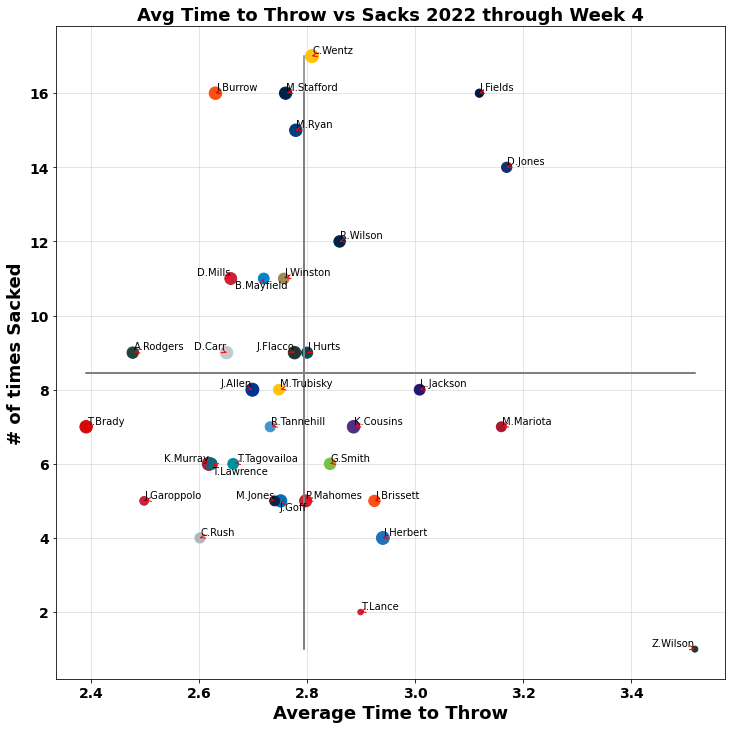

In [9]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Sacked", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('# of times Sacked', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Sacks 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_Sacks.png', dpi=400)
plt.show()

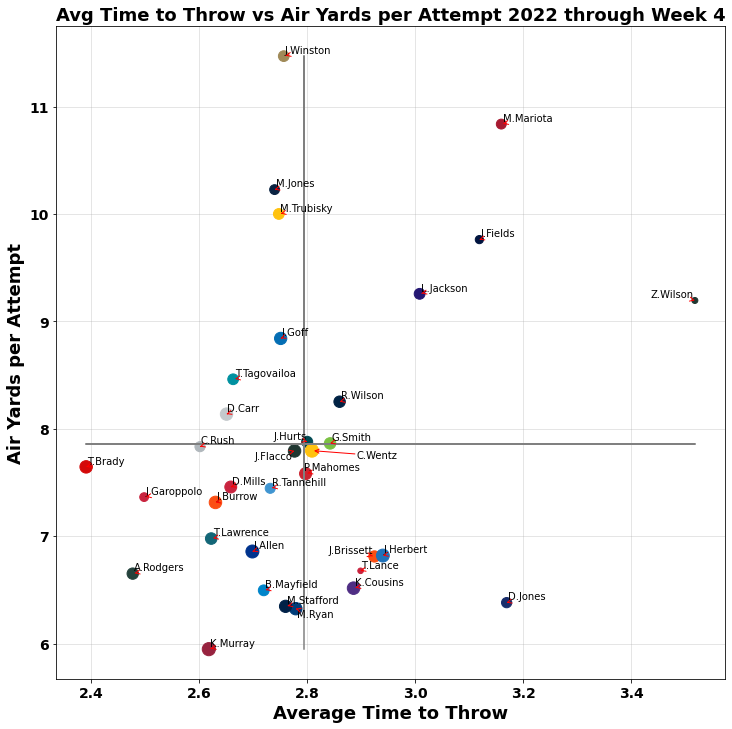

In [10]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Air Yards", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('Air Yards per Attempt', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Air Yards per Attempt 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_AirYardsAttempt.png', dpi=400)
plt.show()

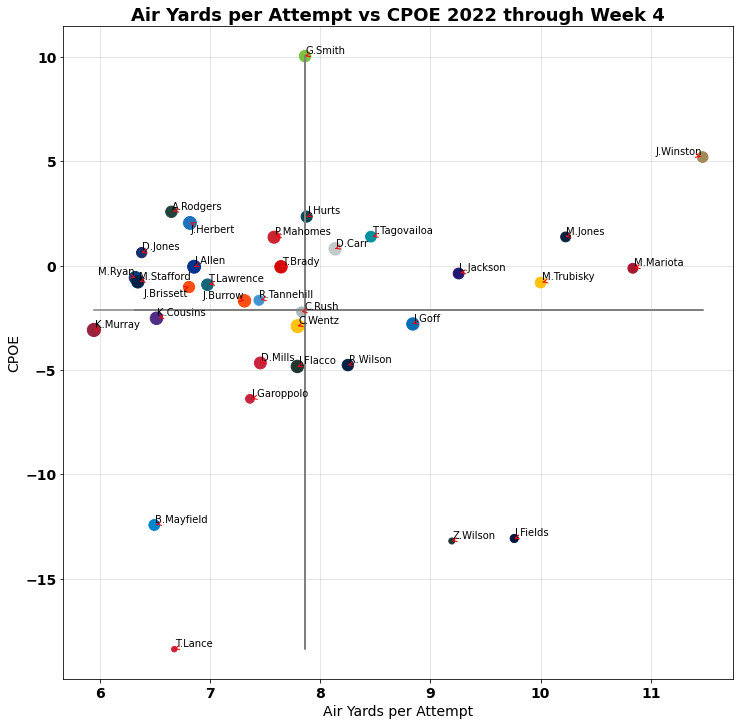

In [11]:
qb_graph = qb_data_full[["player_short_name", "completion_percentage_above_expectation", "Air Yards", "team_abbr", "attempts"]]

y = qb_graph["completion_percentage_above_expectation"]
x = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.ylabel('CPOE', fontsize=14)
plt.xlabel('Air Yards per Attempt', fontsize=14)
plt.title('Air Yards per Attempt vs CPOE 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AirYardsAttempt_vs_CPOE.png', dpi=400)
plt.show()

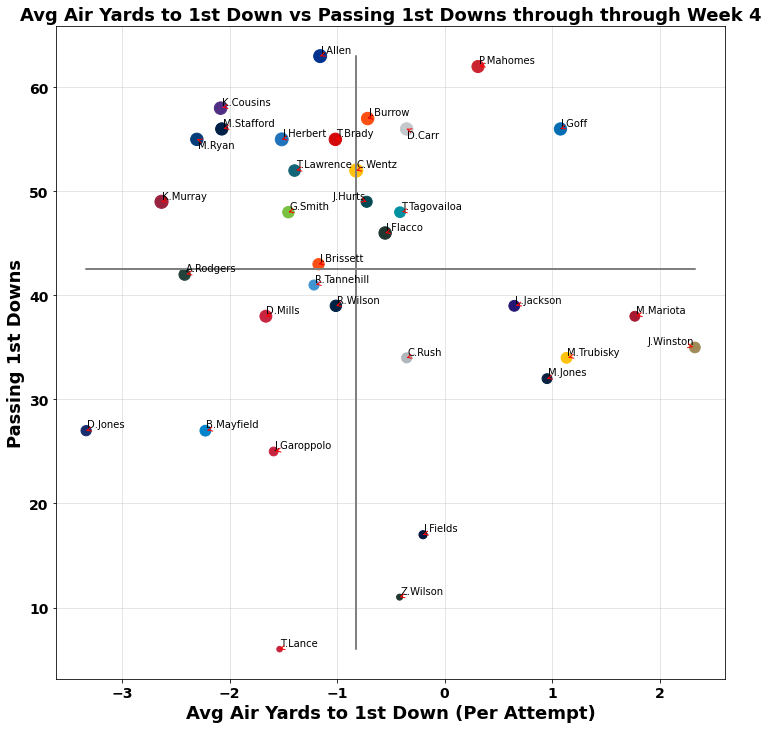

In [12]:
qb_graph = qb_data_full[["player_short_name", "avg_air_yards_to_sticks", "Passing First Downs", "team_abbr", "attempts"]]

x = qb_graph["avg_air_yards_to_sticks"]
y = qb_graph["Passing First Downs"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Air Yards to 1st Down (Per Attempt)', fontsize=18, fontweight = "bold")
plt.ylabel('Passing 1st Downs', fontsize=18, fontweight = "bold")
plt.title('Avg Air Yards to 1st Down vs Passing 1st Downs through through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

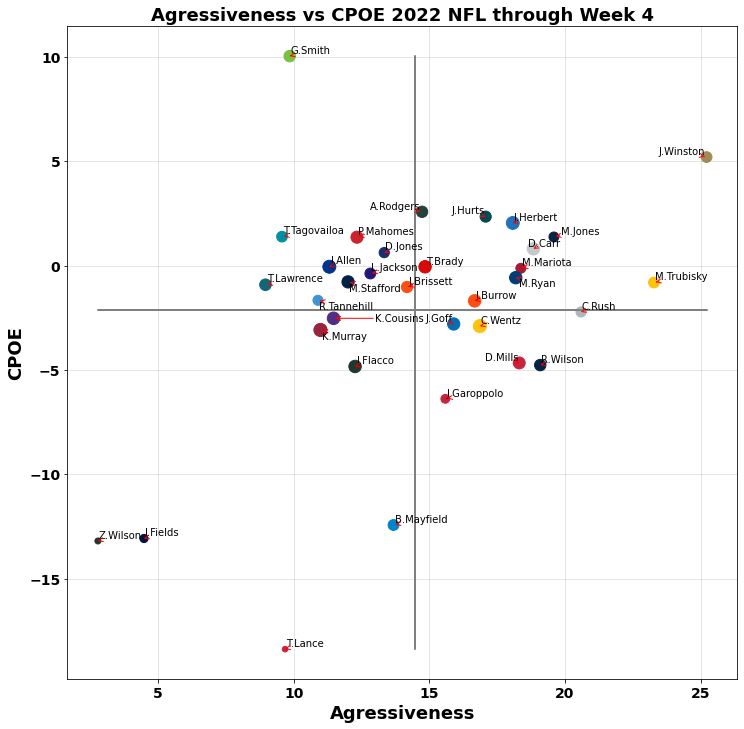

In [13]:
qb_graph = qb_data_full[["player_short_name", "aggressiveness", "completion_percentage_above_expectation", "team_abbr",
                         "attempts"]]

x = qb_graph["aggressiveness"]
y = qb_graph["completion_percentage_above_expectation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Agressiveness', fontsize=18, fontweight = "bold")
plt.ylabel('CPOE', fontsize=18, fontweight = "bold")
plt.title('Agressiveness vs CPOE 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/Agressiveness_vs_CPOE.png', dpi=400)
plt.show()

In [14]:
qb_data_pfr = pd.read_csv("../Resources/advstats_season_pass.csv")
qb_data_pfr = qb_data_pfr.loc[qb_data_pfr["season"] == 2022, :]
qb_data_pfr = qb_data_pfr.drop(columns=["team", "pass_attempts", "season", "pfr_id"])
qb_data_all = qb_data_full.merge(qb_data_pfr, left_on='player_display_name', right_on='player')
qb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played', 'player', 'throwaways', 'spikes', 'drops',
       'drop_pct', 'bad_throws', 'bad_throw_pct', 'pocket_time',
       'times_blitzed', 'times_hurried', 'times_hit', 'times_pressured',
       'pressure_pct', 'batted_balls', 'on_tgt_throws', 

In [15]:
qb_data_all

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,on_tgt_throws,on_tgt_pct,rpo_plays,rpo_yards,rpo_pass_att,rpo_pass_yards,rpo_rush_att,rpo_rush_yards,pa_pass_att,pa_pass_yards
0,Kyler Murray,QB,ARI,2.617503,3.981150,5.997758,-2.016607,10.982659,38.988774,-2.632545,...,123.0,75.0,4.0,18.0,3.0,19.0,1.0,-1.0,7.0,66.0
1,Marcus Mariota,QB,ATL,3.159577,7.966667,10.693830,-2.727163,18.367347,38.677138,1.768298,...,69.0,73.4,48.0,394.0,32.0,345.0,14.0,49.0,15.0,103.0
2,Lamar Jackson,QB,BAL,3.008205,6.492632,9.576549,-3.083917,12.820513,58.484966,0.647345,...,83.0,73.5,27.0,344.0,17.0,199.0,10.0,145.0,17.0,194.0
3,Josh Allen,QB,BUF,2.698222,6.085398,6.861195,-0.775797,11.309524,55.192900,-1.157673,...,123.0,76.9,11.0,70.0,11.0,70.0,0.0,0.0,31.0,308.0
4,Baker Mayfield,QB,CAR,2.719291,4.437500,6.686903,-2.249403,13.675214,54.658197,-2.224602,...,68.0,61.3,2.0,6.0,1.0,0.0,1.0,6.0,24.0,172.0
5,Justin Fields,QB,CHI,3.118940,6.960294,9.314687,-2.354393,4.477612,58.974003,-0.200938,...,41.0,64.1,7.0,15.0,2.0,8.0,5.0,7.0,12.0,183.0
6,Joe Burrow,QB,CIN,2.629788,5.320400,7.654156,-2.333756,16.666667,50.203717,-0.715974,...,112.0,73.7,7.0,62.0,7.0,62.0,0.0,0.0,23.0,205.0
7,Jacoby Brissett,QB,CLE,2.924400,5.587927,7.445285,-1.857358,14.173228,53.859299,-1.172602,...,90.0,73.2,4.0,12.0,4.0,12.0,0.0,0.0,27.0,270.0
8,Cooper Rush,QB,DAL,2.601089,7.017903,8.503776,-1.485872,20.588235,47.203687,-0.353367,...,71.0,71.7,0.0,0.0,0.0,0.0,0.0,0.0,26.0,252.0
9,Russell Wilson,QB,DEN,2.859908,6.311750,8.258413,-1.946663,19.083969,51.552724,-1.011429,...,97.0,77.0,5.0,31.0,5.0,31.0,0.0,0.0,22.0,226.0


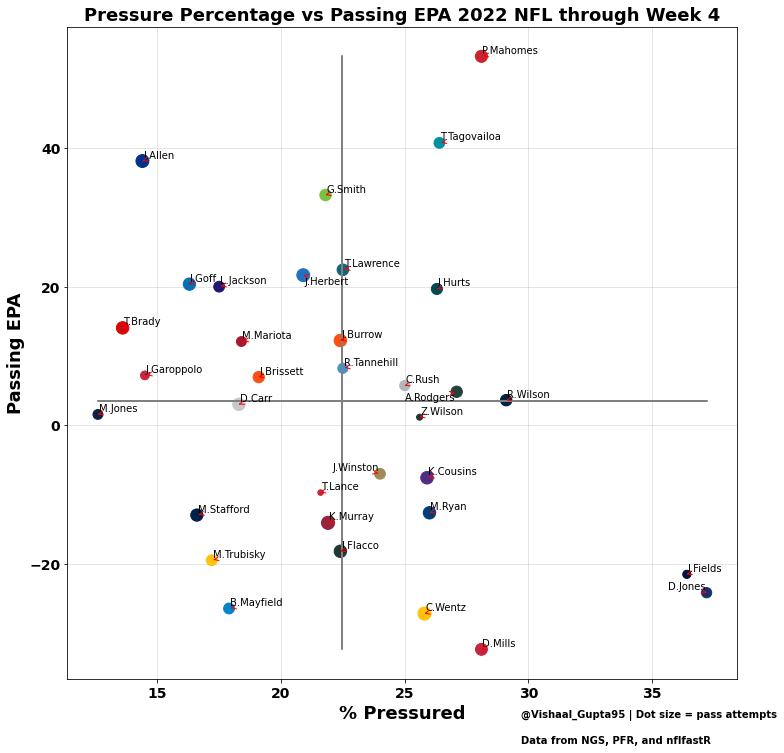

In [31]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "Passing EPA", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["Passing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Passing EPA', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Passing EPA 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
plt.figtext(.65, .08, '@Vishaal_Gupta95 | Dot size = pass attempts', fontsize=10, fontweight = "bold")
plt.figtext(.65, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

plt.savefig('Images/PressurePercentage_vs_PassEPA.png', dpi=400)
plt.show()

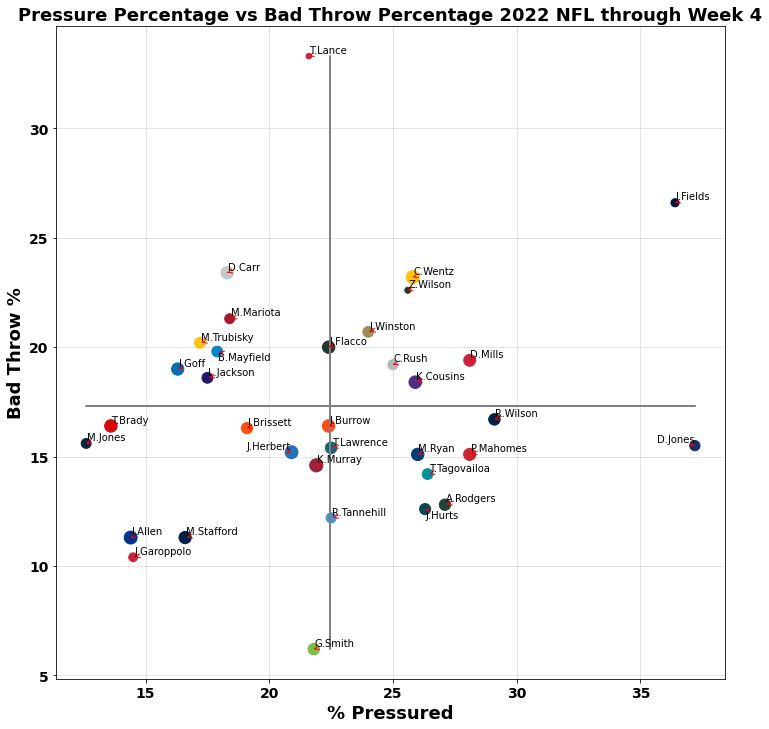

In [17]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "bad_throw_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["bad_throw_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Bad Throw %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Bad Throw Percentage 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

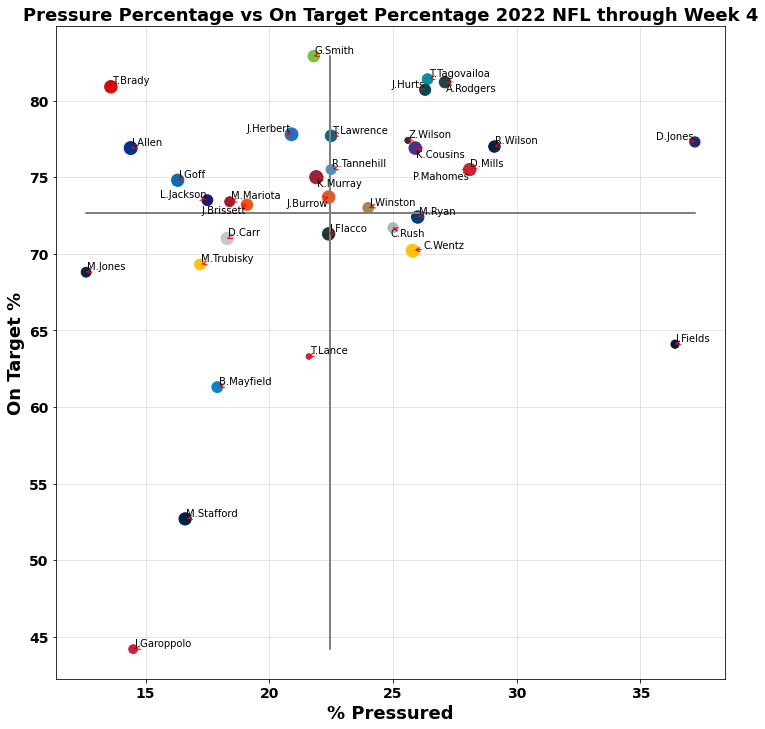

In [18]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "on_tgt_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["on_tgt_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('On Target %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs On Target Percentage 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

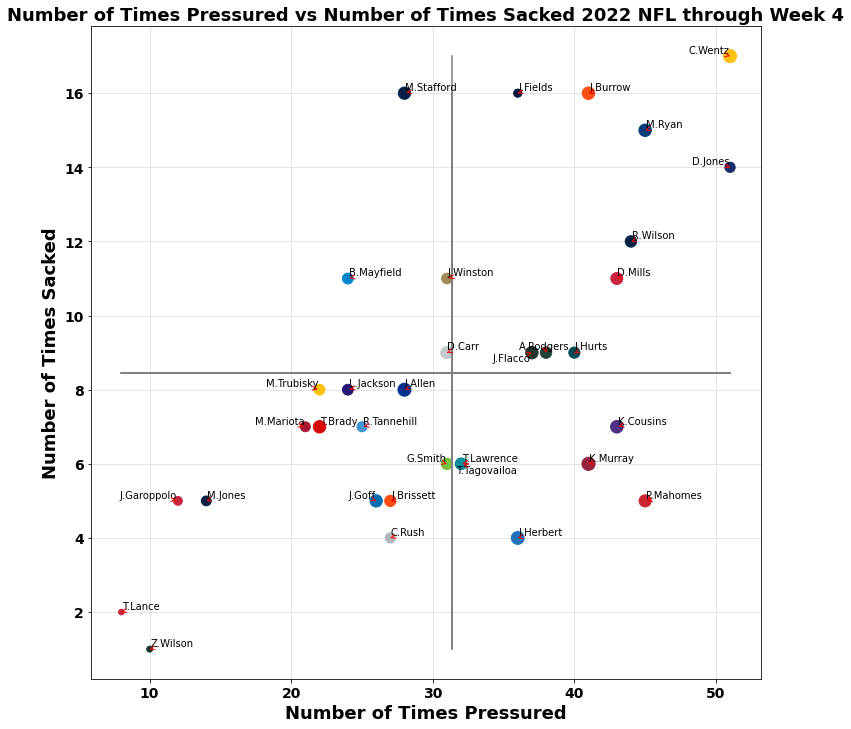

In [19]:
qb_graph = qb_data_all[["player_short_name", "times_pressured", "Sacked", "team_abbr",
                         "attempts"]]

x = qb_graph["times_pressured"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Number of Times Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Number of Times Sacked', fontsize=18, fontweight = "bold")
plt.title('Number of Times Pressured vs Number of Times Sacked 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

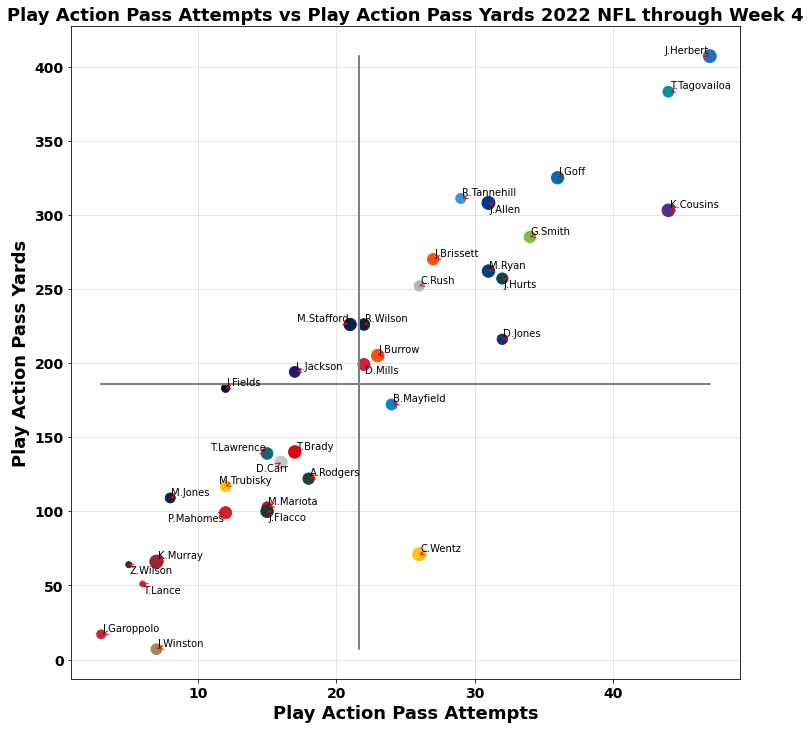

In [20]:
qb_graph = qb_data_all[["player_short_name", "pa_pass_att", "pa_pass_yards", "team_abbr",
                         "attempts"]]

x = qb_graph["pa_pass_att"]
y = qb_graph["pa_pass_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Play Action Pass Attempts', fontsize=18, fontweight = "bold")
plt.ylabel('Play Action Pass Yards', fontsize=18, fontweight = "bold")
plt.title('Play Action Pass Attempts vs Play Action Pass Yards 2022 NFL through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()